# Spinup Comparison

This notebook compares two simulations:
 * `tub-north-tx00-fc02` is a buoyancy-forced gyre simulation, starting from rest and running for 1200 years;
 * `tub-north-tx00-fc02-pert` is the same case, but starts from the year 1000 wind-driven spinup. 
The question is whether these two simulations reach the same state. The answer is: **Yes, they do!** 
From this result we infer that it is sufficient to analyse the perturbation cases for all simulations.

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:45095 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [3]:
db='/home/157/amh157/tub-north/tub-north.db'

In [4]:
session = cc.database.create_session(db)

In [5]:
def plot_mercator(ax,X0,Y0):
    X,Y = np.meshgrid(X0,Y0)
    X_alt = (X - 20)*np.cos(Y*np.pi/180) + 20
    
    ax.set_frame_on(False)
    ax.plot(X_alt[:,0],Y[:,0],'k')
    ax.plot(X_alt[:,-1],Y[:,-1],'k')
    ax.plot([X_alt[-1,0], X_alt[-1,-1]],[69.8, 69.8],'k')
    ax.plot([X_alt[0,0], X_alt[0,-1]],[10.1, 10.1],'k')
    ax.set_xlabel('Longitude')
    
    ax.set_ylim(ymin=10,ymax=70)
    plt.setp(ax,'xticks',[10, 20, 30])
    return X_alt, Y

In [6]:
base_expt = 'tub-north-tx00-fc02'
pert_expt = 'tub-north-tx00-fc02-pert'
start_time = '1100-01-01'

# MLD

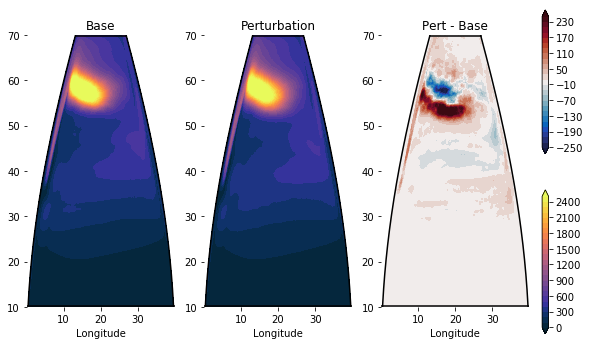

In [14]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(0,2500,26)
vlev2 = np.linspace(-250,250,26)
variable = 'mlotst'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )
MLD = darray.mean('Time')
X,Y = plot_mercator(ax[0],MLD.coords['xh'],MLD.coords['yh'])
p1=ax[0].contourf(X,Y,MLD,levels=vlev,extend='both',cmap=cm.cm.thermal)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )
pert_MLD = darray.mean('Time')
X,Y = plot_mercator(ax[1],MLD.coords['xh'],MLD.coords['yh'])
p1=ax[1].contourf(X,Y,pert_MLD,levels=vlev,extend='both',cmap=cm.cm.thermal)
ax[1].set_title('Perturbation')

diff_MLD = pert_MLD-MLD
X,Y = plot_mercator(ax[2],MLD.coords['xh'],MLD.coords['yh'])
p2=ax[2].contourf(X,Y,diff_MLD,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)

cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

# Heat Flux

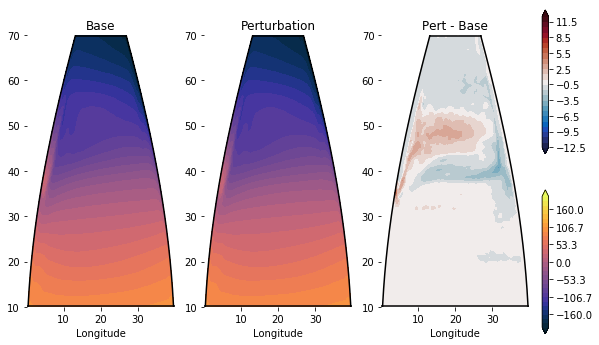

In [16]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(-200,200,31)
vlev2 = np.linspace(-12.5,12.5,26)
variable = 'heat_added'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )
HF = darray.mean('Time')
X,Y = plot_mercator(ax[0],HF.coords['xh'],HF.coords['yh'])
p1=ax[0].contourf(X,Y,HF,levels=vlev,extend='both',cmap=cm.cm.thermal)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )
pert_HF = darray.mean('Time')
X,Y = plot_mercator(ax[1],HF.coords['xh'],HF.coords['yh'])
p1=ax[1].contourf(X,Y,pert_HF,levels=vlev,extend='both',cmap=cm.cm.thermal)
ax[1].set_title('Perturbation')

diff_HF = pert_HF-HF
X,Y = plot_mercator(ax[2],HF.coords['xh'],HF.coords['yh'])
p2=ax[2].contourf(X,Y,diff_HF,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

# SSH

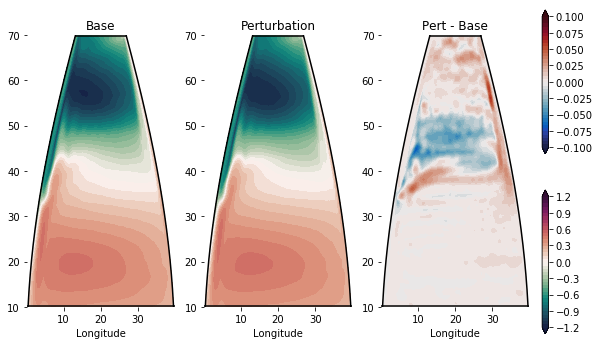

In [17]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(-1.2,1.2,41)
vlev2 = np.linspace(-0.1,0.1,41)
variable = 'SSH'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )
SSH = darray.mean('Time')
X,Y = plot_mercator(ax[0],SSH.coords['xh'],SSH.coords['yh'])
p1=ax[0].contourf(X,Y,SSH,levels=vlev,extend='both',cmap=cm.cm.curl)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )
pert_SSH = darray.mean('Time')
X,Y = plot_mercator(ax[1],SSH.coords['xh'],SSH.coords['yh'])
p1=ax[1].contourf(X,Y,pert_SSH,levels=vlev,extend='both',cmap=cm.cm.curl)
ax[1].set_title('Perturbation')

diff_SSH = pert_SSH-SSH
X,Y = plot_mercator(ax[2],SSH.coords['xh'],SSH.coords['yh'])
p2=ax[2].contourf(X,Y,diff_SSH,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)


# Upper Ocean Streamfunction

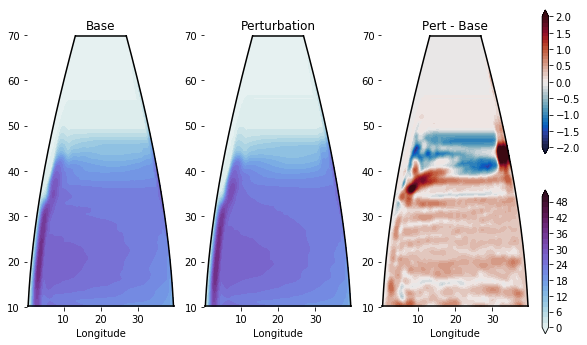

In [28]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(0,50,26)
vlev2 = np.linspace(-2,2,41)
variable = 'vh_rho'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )/1e6
psi = darray.mean('Time').sel(rho_l=slice(None,1034)).sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[0],psi.coords['xh'],psi.coords['yq'])
p1=ax[0].contourf(X,Y,psi,levels=vlev,extend='both',cmap=cm.cm.dense)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )/1e6
pert_psi = darray.mean('Time').sel(rho_l=slice(None,1034)).sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[1],psi.coords['xh'],psi.coords['yq'])
p1=ax[1].contourf(X,Y,pert_psi,levels=vlev,extend='both',cmap=cm.cm.dense)
ax[1].set_title('Perturbation')

diff_psi = pert_psi-psi
X,Y = plot_mercator(ax[2],psi.coords['xh'],psi.coords['yq'])
p2=ax[2].contourf(X,Y,diff_psi,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

# Lower Ocean Streamfunction

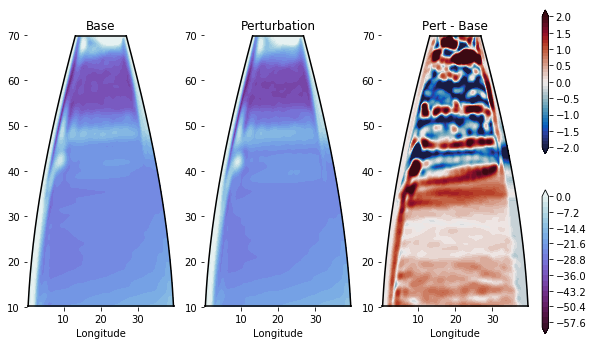

In [27]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(-60,0,26)
vlev2 = np.linspace(-2,2,41)
variable = 'vh_rho'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )/1e6
psi = darray.mean('Time').sel(rho_l=slice(1034,None)).sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[0],psi.coords['xh'],psi.coords['yq'])
p1=ax[0].contourf(X,Y,psi,levels=vlev,extend='both',cmap=cm.cm.dense_r)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )/1e6
pert_psi = darray.mean('Time').sel(rho_l=slice(1034,None)).sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[1],psi.coords['xh'],psi.coords['yq'])
p1=ax[1].contourf(X,Y,pert_psi,levels=vlev,extend='both',cmap=cm.cm.dense_r)
ax[1].set_title('Perturbation')

diff_psi = pert_psi-psi
X,Y = plot_mercator(ax[2],psi.coords['xh'],psi.coords['yq'])
p2=ax[2].contourf(X,Y,diff_psi,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

# Barotropic Streamfunction

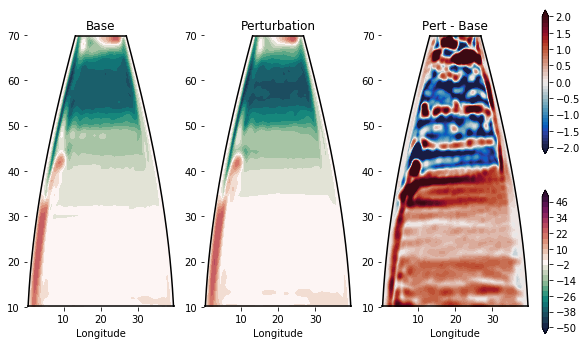

In [25]:
fig, ax = plt.subplots(1,3,figsize=(9,5))
vlev = np.linspace(-50,50,26)
vlev2 = np.linspace(-2,2,41)
variable = 'vh_rho'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )/1e6
psi = darray.mean('Time').sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[0],psi.coords['xh'],psi.coords['yq'])
p1=ax[0].contourf(X,Y,psi,levels=vlev,extend='both',cmap=cm.cm.curl)
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )/1e6
pert_psi = darray.mean('Time').sum('rho_l').cumsum('xh')
X,Y = plot_mercator(ax[1],psi.coords['xh'],psi.coords['yq'])
p1=ax[1].contourf(X,Y,pert_psi,levels=vlev,extend='both',cmap=cm.cm.curl)
ax[1].set_title('Perturbation')

diff_psi = pert_psi-psi
X,Y = plot_mercator(ax[2],psi.coords['xh'],psi.coords['yq'])
p2=ax[2].contourf(X,Y,diff_psi,levels=vlev2,extend='both',cmap=cm.cm.balance)
ax[2].set_title('Pert - Base')


cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

# Overturning

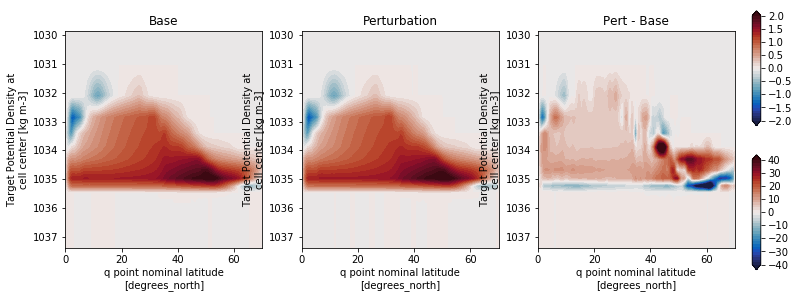

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
vlev = np.linspace(-40,40,41)
vlev2 = np.linspace(-2,2,41)
variable = 'vh_rho'

darray = cc.querying.getvar(base_expt, variable, session, start_time=start_time )/1e6
psi = darray.mean('Time').sum('xh').cumsum('rho_l')
p1 = psi.plot.contourf(ax=ax[0],levels=vlev,extend='both',cmap=cm.cm.balance,add_colorbar=False)
ax[0].invert_yaxis()
ax[0].set_title('Base')

darray = cc.querying.getvar(pert_expt, variable, session, start_time=start_time )/1e6
pert_psi = darray.mean('Time').sum('xh').cumsum('rho_l')
p1 = pert_psi.plot.contourf(ax=ax[1],levels=vlev,extend='both',cmap=cm.cm.balance,add_colorbar=False)
ax[1].invert_yaxis()
ax[1].set_title('Perturbation')

diff_psi = pert_psi-psi
p2 = diff_psi.plot.contourf(ax=ax[2],levels=vlev2,extend='both',cmap=cm.cm.balance,add_colorbar=False)
ax[2].invert_yaxis()
ax[2].set_title('Pert - Base')

cax=plt.axes([0.92,0.05,0.01,.4])
plt.colorbar(p1,cax=cax)
cax=plt.axes([0.92,0.55,0.01,.4])
plt.colorbar(p2,cax=cax)

